In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combined = pd.concat([train,test])

In [5]:
# Look at different attributes available in the dataset
print(train.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [11]:
# Look at missing values percentage for each attribute
print("Missing % of attributes in Train")
print( train.apply(lambda x: x.isnull().sum()*100.0/len(train),axis=0) )
print("Missing % of attributes in Test")
print( test.apply(lambda x: x.isnull().sum()*100.0/len(test),axis=0) )

Missing % of attributes in Train
id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64
Missing % of attributes in Test
id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.177249
smoking_status       30.917693
dtype: float64


In [13]:
# Note that some BMI and Smoking_Status values are missing from both the train and test set
# These must be imputed


In [15]:
# Look at percentage of rows having atleast one missing value
print("Missing % of attributes in Train")
print(train.apply(lambda x: 1 if x.isnull().sum() > 0 else 0,axis=1).sum() /len(train))
print("Missing % of attributes in Test")
print(test.apply(lambda x: 1 if x.isnull().sum() > 0 else 0,axis=1).sum() / len(test))

Missing % of attributes in Train


0.330138248848
Missing % of attributes in Test


0.332132681039


In [0]:
# ~33% rows have missing values in both train and test set and so we cannot simply ignore missing rows

In [16]:
# Percentage of patients who have a stroke
print(train.stroke.value_counts() * 100.0 / len(train))

0    98.195853
1     1.804147
Name: stroke, dtype: float64


In [17]:
# Dataset is highly imbalanced as only ~1.8% samples with class 1
# Let's look at the distribution of individual attributes and how they affect the dependent variable 'stroke'

In [31]:
# Heart Disease
print('Possible Values')
print(train.heart_disease.unique())
# % of patients having heart-disease
print( train.heart_disease.value_counts() * 100.0 / len(train) )
# Look at stroke values pivoted by heart-disease
print(train.pivot_table(index='heart_disease',values='stroke',aggfunc=('mean','count')))

Possible Values
[0 1]
0    95.248848
1     4.751152
Name: heart_disease, dtype: float64
               count      mean
heart_disease                 
0              41338  0.014660
1               2062  0.085839


In [30]:
# Hypertension
print('Possible Values')
print(train.hypertension.unique())
# % of patients having hypertension
print( train.hypertension.value_counts() * 100.0 / len(train) )
# Look at stroke values pivoted by hypertension
print(train.pivot_table(index='hypertension',values='stroke',aggfunc=('mean','count')))

[0 1]
0    90.642857
1     9.357143
Name: hypertension, dtype: float64
              count      mean
hypertension                 
0             39339  0.014820
1              4061  0.049249


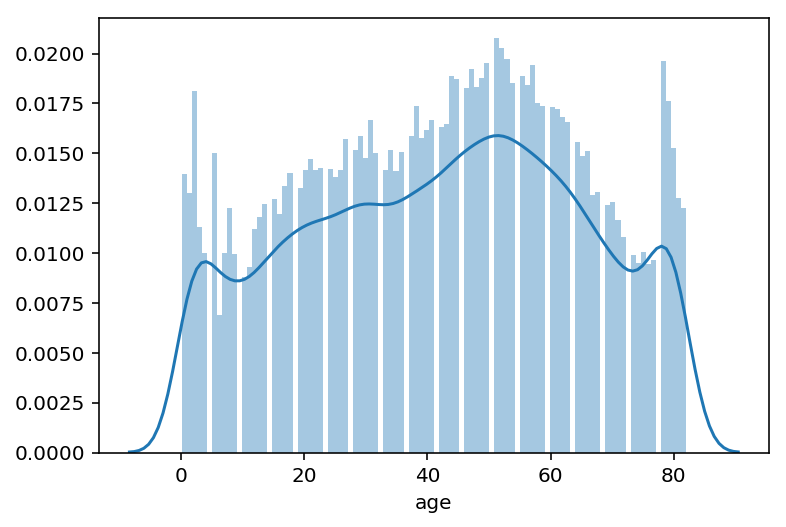

In [24]:
# Age
# Distribution Of Age
sns.distplot(train.age,bins=100)
plt.show()
# Age is fairly evenly distributed in the age group of 0-80

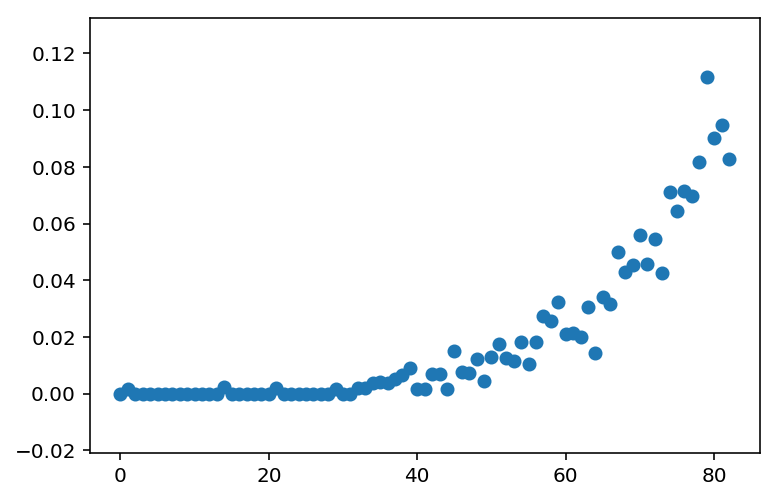

In [29]:
# Plot mean stroke rate grouped by age
ageData = train.pivot_table(index=np.round(train.age),values='stroke',aggfunc=('mean','count'))
plt.scatter(ageData.index,ageData['mean'])
plt.show()
# Clearly, increase in age exponentially increases the risk of having a stroke
# Also note that below the age of 30, the risk of stroke is almost certainly 0

In [33]:
# Gender
print('Possible Values')
print(train.gender.unique())
print("% of patients for each gender")
print( train.gender.value_counts() * 100.0 / len(train) )
print("Look at stroke values pivoted by gender")
train.pivot_table(index='gender',values='stroke',aggfunc=('mean','count'))
# Males seem to have a higher risk on average. However, difference is not too profound

Possible Values
['Male' 'Female' 'Other']
% of patients for each gender
Female    59.135945
Male      40.838710
Other      0.025346
Name: gender, dtype: float64
Look at stroke values pivoted by gender


,count,mean
gender,,
Female,25665,0.016793
Male,17724,0.019860
Other,11,0.000000


In [35]:
# Work Type
print('Possible Values')
print(train.work_type.unique())
print("% of patients for each work-type")
print( train.work_type.value_counts() * 100.0 / len(train) )
print("Look at stroke values pivoted by work_type")
train.pivot_table(index='work_type',values='stroke',aggfunc=('mean','count'))
# The never worked category most probably includes children and hence the low stroke risk.There is a difference in risk of stroke for each group
# but according to studies this is not a relevant feature. Will use this a see if it helps in the final model

Possible Values
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
% of patients for each work-type
Private          57.221198
Self-employed    15.652074
children         14.184332
Govt_job         12.534562
Never_worked      0.407834
Name: work_type, dtype: float64
Look at stroke values pivoted by work_type


,count,mean
work_type,,
Govt_job,5440,0.016360
Never_worked,177,0.000000
Private,24834,0.017758
Self-employed,6793,0.036950
children,6156,0.000325


In [36]:
# Residence Type
print('Possible Values')
print(train.Residence_type.unique())
print("% of patients for each residence-type")
print( train.Residence_type.value_counts() * 100.0 / len(train) )
print("Look at stroke values pivoted by residence_type")
train.pivot_table(index='Residence_type',values='stroke',aggfunc=('mean','count'))
# Again, not an important factor according to studies and mean is almost te same, doesn't seem relevant

Possible Values
['Rural' 'Urban']
% of patients for each residence-type
Urban    50.129032
Rural    49.870968
Name: Residence_type, dtype: float64
Look at stroke values pivoted by residence_type


,count,mean
Residence_type,,
Rural,21644,0.017742
Urban,21756,0.018340


In [38]:
# Ever Married
print('Possible Values')
print(train.ever_married.unique())
print("% of patients for each ever_married")
print( train.ever_married.value_counts() * 100.0 / len(train) )
print("Look at stroke values pivoted by ever-married")
train.pivot_table(index='ever_married',values='stroke',aggfunc=('mean','count'))
# Seems that people who have married have a higher risk of stroke. But this may well be a confounding factor as married people tend to be older and increase in age leads to increased risk stroke rate as we saw earlier
# Also, not an important feature according to studies

Possible Values
['No' 'Yes']
% of patients for each ever_married
Yes    64.373272
No     35.626728
Name: ever_married, dtype: float64
Look at stroke values pivoted by ever-married


,count,mean
ever_married,,
No,15462,0.005174
Yes,27938,0.025163


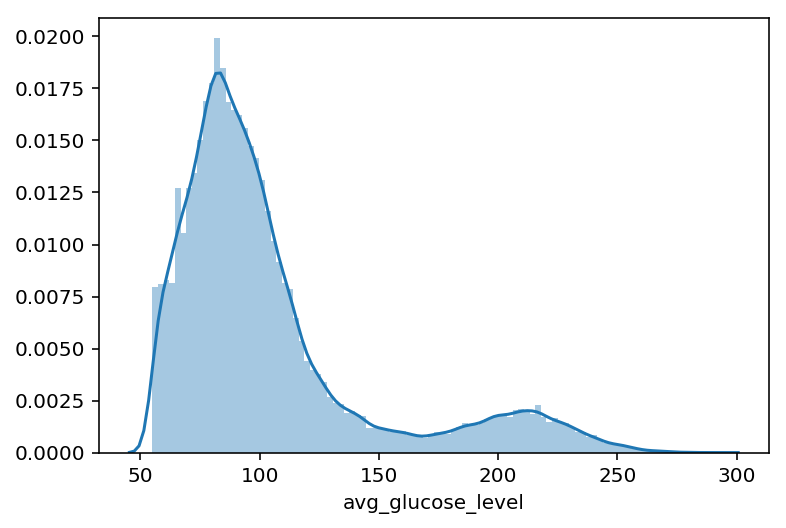

In [39]:
# Average Glucose Level
# Distribution Of Avg. Glucose Level
sns.distplot(train.avg_glucose_level,bins=100)
plt.show()

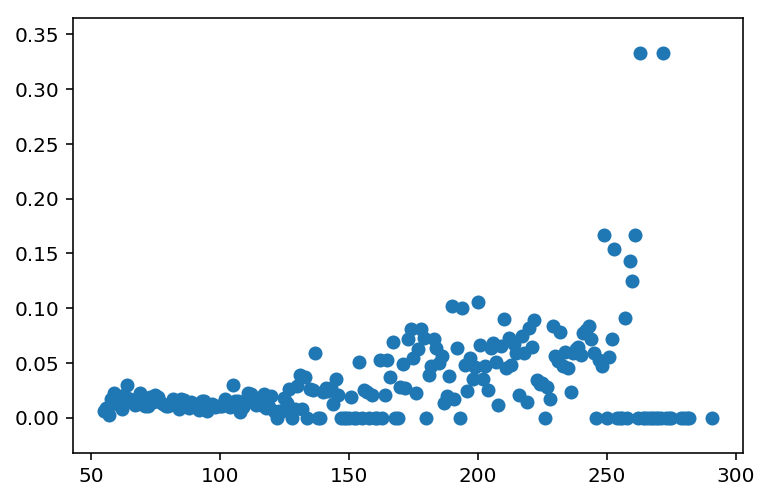

In [40]:
# Plot mean stroke rate grouped by average glucose level
glucoseData = train.pivot_table(index=np.round(train.avg_glucose_level),values='stroke',aggfunc=('mean','count'))
plt.scatter(glucoseData.index,glucoseData['mean'])
plt.show()
# We see an increase risk of stroke with increase in glucose levels
# It would be important to impute these missing values

In [41]:
# Smoking Status
print('Possible Values')
print(train.smoking_status.unique())
print("% of patients for each smoking-status")
print( train.smoking_status.value_counts() * 100.0 / len(train) )
print("Look at stroke values pivoted by smoking_status")
train.pivot_table(index='smoking_status',values='stroke',aggfunc=('mean','count'))
# Having smoked seems to affect the risk of stroke. It would be important to impute missing values for these

Possible Values
[nan 'never smoked' 'formerly smoked' 'smokes']
% of patients for each smoking-status
never smoked       36.988479
formerly smoked    17.264977
smokes             15.119816
Name: smoking_status, dtype: float64
Look at stroke values pivoted by smoking_status


,count,mean
smoking_status,,
formerly smoked,7493,0.029494
never smoked,16053,0.017691
smokes,6562,0.020268


In [42]:
# Based on a rudimentary analysis of each of the feature and some studies I went through, it seems that the following features should have a role to # play:
# - BMI
# - Smoking Status
# - Average Glucose Levels
# - Age
# - Gender
# - Work Type

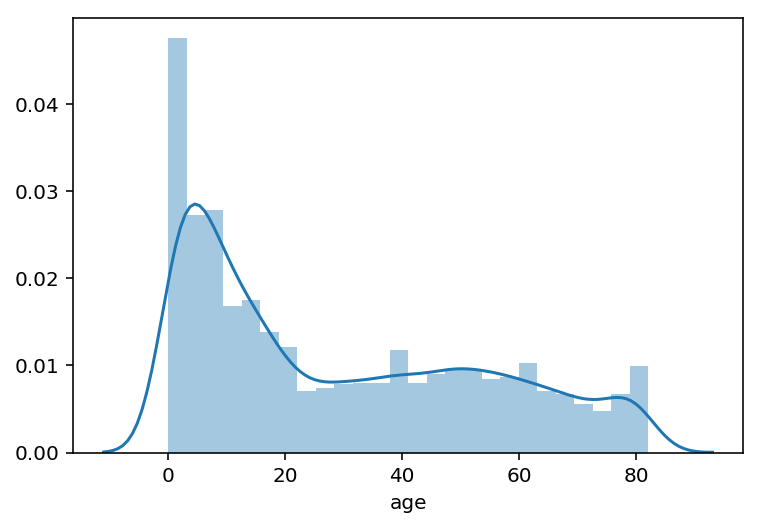

In [6]:
# Let's start by imputing missing values
# For this I considered the combined train and test set data
# Let's look at which age group has misssing values for smoking_status
sns.distplot(combined[combined.smoking_status.isnull()].age)
plt.show()
# smoketab = pd.crosstab([combined.gender, np.round(combined.age, -1)], combined.smoking_status).apply(lambda x: x / x.sum(), axis=1)
# print(smoketab)

In [8]:
# we can see a major chunk of missing values is in the 0-20 age group. These are mostly teenagers and children.
# Being on a conservative side, I imputed smoking_status of patients less than 10 years of age as 'never smoked'. Reasonable assumption.
combined.loc[combined.age < 10,'smoking_status'] = 'never smoked'

In [9]:
# I then decided to look at the average percentage of patients in each category based on age and gender
smoketab = pd.crosstab([combined.gender, np.round(combined.age, -1)], combined.smoking_status).apply(lambda x: x / x.sum(), axis=1)
print(smoketab)


smoking_status  formerly smoked  never smoked    smokes
gender age                                             
Female 0.0             0.000000      1.000000  0.000000
       10.0            0.047619      0.943537  0.008844
       20.0            0.134809      0.675769  0.189422
       30.0            0.179197      0.564807  0.255996
       40.0            0.187843      0.584156  0.228001
       50.0            0.226199      0.531462  0.242339
       60.0            0.272867      0.537819  0.189314
       70.0            0.325534      0.513917  0.160549
       80.0            0.321608      0.584461  0.093931
Male   0.0             0.000000      1.000000  0.000000
       10.0            0.043507      0.950560  0.005933
       20.0            0.130457      0.672557  0.196985
       30.0            0.179721      0.491953  0.328326
       40.0            0.206071      0.505357  0.288571
       50.0            0.254754      0.446358  0.298888
       60.0            0.352091      0.406560  0

In [10]:
# We can clearly see some categories to be more prominent for certain groups. For example, percentage of never smoked patients is decreasing with an increase in age group. Also, in the 30-40 age group, men seem to smoke more.
# So, for each patient with missing smoke_status value, I indexed into the appropriate age and gender group and picked the category with the maximum percetange of population. So, basically a group-wise mode!
combined.smoking_status = combined.apply(lambda x: np.argmax(smoketab.loc[x['gender']].loc[int(np.round(x['age'],-1))]),axis=1)

In [0]:
# For BMI I followed a similar approach. I grouped by age and took the median of each group ( considering that some BMI values appeared to be outliers ie. > 60 or something)
# Age and gender based grouping was also an option, but I didn't use that during the contest
bmiByAge = combined[~combined.bmi.isnull()].pivot_table(index=np.round(combined[~combined.bmi.isnull()].age,-1),values='bmi',aggfunc='median')
combined.loc[combined.bmi.isnull(),'bmi'] = combined[combined.bmi.isnull()].apply(lambda x: bmiByAge.loc[int(np.round(x['age'],-1))],axis=1)


In [12]:
# HTpHD - New Feature
# I introduced a feature which is the sum of heart_disease and hypertension variables
# Intuition was to create a variable to indicate the severeness of diseases
combined.loc[:, 'HTpHD'] = combined.heart_disease + combined.hypertension


In [16]:
# Modelling: Feature selection and paramter tuning
# I picked logistic regression, xgboost trees and a catboost model for prediction.
# Parameters were tuned using randomized search and 5-fold cross-validation
# Features were selected based on whether they led to an increase in validation accuracy
# Selected Features: ['smoking_status','age','heart_disease','hypertension','HTpHD','avg_glucose_level','gender']
# Average of the best performing models for each classifier was taken as the final output
# (Python code for the modelling part is present in the Git repository)